In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Geração de gráficos
import matplotlib.pyplot as plt

# Bibliotecas para o aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Carrega o dataset original para um pandas Dataframe
dataset = pd.read_csv('APS.csv')

# Remove regitros incorretos do dataset
df_remove = dataset.loc[(dataset['y1'] < 1893) | (dataset['y2'] > 2018)]
dataset = dataset.drop(df_remove.index)

# Criação de uma nova feature que mostra a diferença entre o ano da primeira e da última publicação na base de dados
dataset['y2y1_dif'] = dataset['y2'] - dataset['y1']

# Remoção de features não necessárias
dt = dataset.drop(columns=['name','y1','y2','h_future_3','i4_future_3','i5_future_3'])

In [3]:
X = dt.drop(columns=['i3_future_3'])
col = X.columns
X = X.values
y = np.ravel(pd.DataFrame(dt, columns=['i3_future_3']).to_numpy())

In [4]:
# Normalização
escala = StandardScaler()
escala.fit(X)
X = escala.transform(X)

In [5]:
# Divide em conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

In [6]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import loguniform
# Defina a grade de hiperparâmetros
param_space = {
    'hidden_layer_sizes': [(100,), (300,), (700,), (1000,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init' : [1e-5,1e-3,1e-1,1e-9],
    'epsilon' : [0.1,0.5,0.9,0.01],
    'n_iter_no_change' : [10,20,30,70],
}

# Cria o modelo MLPRegressor
mlp = MLPRegressor(max_iter=1000, activation='relu', solver='adam')

# Executa a pesquisa em grade
halving_random_search = HalvingRandomSearchCV(mlp,
                                              param_space,
                                              n_candidates=30,
                                              factor=2,
                                              random_state=39,
                                              verbose = 1
                                             )
halving_random_search.fit(X_train, y_train)

# Obtem os melhores hiperparâmetros
best_params = halving_random_search.best_params_
print(best_params)


# Crie um novo modelo MLPRegressor com os melhores hiperparâmetros
best_mlp = MLPRegressor(
    learning_rate_init=best_params['learning_rate_init'],
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    alpha=best_params['alpha'],
    epsilon=best_params['epsilon'],
    max_iter=10000,
    n_iter_no_change=30,
)

# Treine o modelo com os dados de treinamento
best_mlp.fit(X_train, y_train)

# Faça previsões com o modelo treinado
y_pred = best_mlp.predict(X_test)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 12
min_resources_: 10
max_resources_: 39244
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 30
n_resources: 10
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

----------
iter: 1
n_candidates: 15
n_resources: 20
Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

----------
iter: 2
n_candidates: 8
n_resources: 40
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

----------
iter: 3
n_candidates: 4
n_resources: 80
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

----------
iter: 4
n_candidates: 2
n_resources: 160
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\UFMA\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

{'n_iter_no_change': 10, 'learning_rate_init': 1e-05, 'hidden_layer_sizes': (1000,), 'epsilon': 0.01, 'alpha': 0.001}


In [13]:
# Métricas

#y_pred = rna.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared = False))
print("R2:",r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

#y_pred = np.around(y_pred,0).astype(int)
#np.savetxt('data/MLP_y_pred.csv', y_pred, delimiter=',', header='MLP_y_pred')

RMSE: 1.222862263731782
R2: 0.47563360688145573
MAE: 0.6253047149057613


In [14]:
best_mlp

MLPRegressor(alpha=0.001, epsilon=0.01, hidden_layer_sizes=(1000,),
             learning_rate_init=1e-05, max_iter=10000, n_iter_no_change=30)

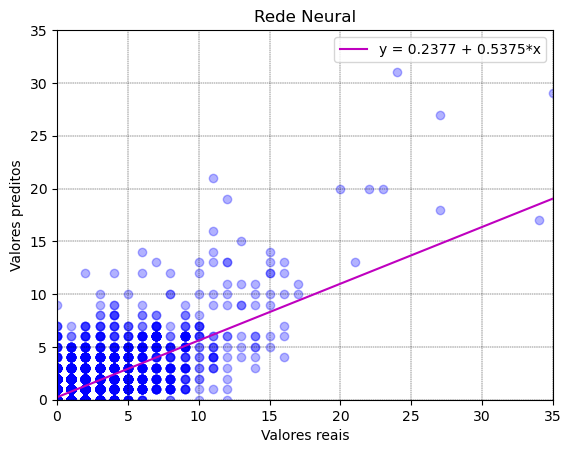

In [15]:
# Regressão Linear usando os dados de teste e preditos
lr=LinearRegression().fit(y_test.reshape(-1, 1),y_pred.reshape(-1, 1))
a,b = float(lr.coef_[0]), float(lr.intercept_[0])
x = np.linspace(0,90)

plt.title('Rede Neural')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.xlim(0, 35)
plt.ylim(0, 35)

plt.plot(x , (b + a*x),'m', label = 'y = {:.4f} + {:.4f}*x'.format(b,a))
plt.scatter(y_test, y_pred, c='b', marker='o', alpha=0.3)

plt.grid(linestyle='--', linewidth='0.3', color='black')
plt.legend(loc='best')
plt.savefig('ANN_model.png',dpi=600)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(y_test.reshape(-1, 1),y_pred.reshape(-1, 1))
print(f'Parâmetros: intercept: {lr.intercept_}, coef: {lr.coef_}')

Parâmetros: intercept: [0.23766217], coef: [[0.53750779]]
